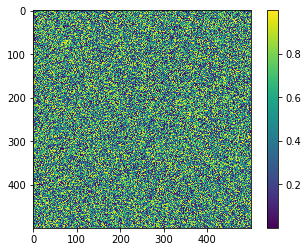

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

randimg = np.random.random([500,500])
plt.imshow(randimg)
plt.colorbar()

In [2]:
import glob
from PIL import Image

filelist = glob.glob('/Users/Erkin/Documents/School/CS Conc/CS156/Data/chosen images/male/*.JPEG')

array = np.array([np.array(Image.open(fname)) for fname in filelist])

In [3]:
mensdata = array[0:200]

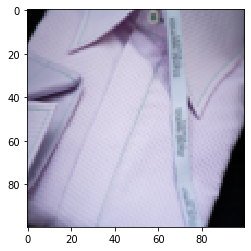

In [4]:
from skimage.transform import resize



plt.imshow(resize(mensdata[0], (100, 100)))

plt.gray() 
plt.show()

In [5]:
filelist = glob.glob('/Users/Erkin/Documents/School/CS Conc/CS156/Data/chosen images/female/*.JPEG')
array2 = np.array([np.array(Image.open(fname)) for fname in filelist])

womensdata = array2[0:200]

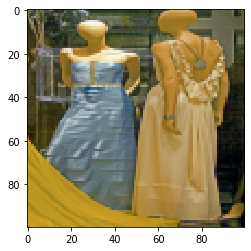

In [6]:
plt.imshow(resize(womensdata[0], (100, 100)))

plt.gray() 
plt.show()

In [7]:
target = []

for i in range(200):
    target.append("Men")


for i in range(200):
    target.append("Women")

In [8]:
dataset = np.concatenate((mensdata, womensdata), axis=0)

In [9]:
import matplotlib.image as mpimg
from skimage import io, color

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [11]:
TranformedData = []

In [12]:
for i in range(len(dataset)):
    temp = rgb2gray(dataset[i])
    temp2 = resize(temp, (256, 256)).flatten()
    TranformedData.append(temp2)

In [13]:
print(len(dataset),len(target))

400 400


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(TranformedData, target, test_size=0.5)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=1, svd_solver = 'randomized')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/Erkin/PycharmProjects/Images/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[ 81   9]
 [100  10]]
Accuracy0.455
